In [1]:
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets, transforms

In [2]:
# data 다운
# https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=126 에서 받을 수 있어요

!pip install gdown
!gdown https://drive.google.com/uc?id=14lAjaR2dRp5p5kEsm5GnwNM9KH-VgoOq -O 대화체.xlsx

Downloading...
From: https://drive.google.com/uc?id=14lAjaR2dRp5p5kEsm5GnwNM9KH-VgoOq
To: /content/대화체.xlsx
100% 9.57M/9.57M [00:00<00:00, 50.1MB/s]


In [3]:
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        return self.data.loc[idx, '원문'], self.data.loc[idx, '번역문']

In [4]:
BATCH_SIZE = 8

data = pd.read_excel('대화체.xlsx')
custom_DS = CustomDataset(data)
train_DS, val_DS, test_DS, _ = random_split(custom_DS, [32,16,8, len(custom_DS)-32-16-8])

train_DL = DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
val_DL = DataLoader(val_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

print(len(train_DS))
print(len(val_DS))
print(len(test_DS))

32
16
8


In [5]:
# train_DL 테스트
src_texts, trg_texts = next(iter(train_DL))

print(src_texts)
print(trg_texts)
print(len(src_texts))
print(len(trg_texts))

('아니에요, 9시 뉴스를 보면 되니깐 같이 봅시다.', '예약하신 날짜와 성함을 말씀해주세요.', '메이크업 브러시만을 파는 가게가 있다고 들었는데요.', '그 바로 옆에 있으니까 다시 봐보세요.', '점심시간 전에는 퇴원할 수 있나요?', '너무 매워서요, 제가 매운 거를 전혀 못 먹어요.', '그분이 브러시 장인으로 불릴 만큼 브러시에 대해 잘 알고 계세요.', '그래? 나도 영화감상 동아리에 가입할 걸 그랬어. 수학 풀이 동아리에 들어가서 종일 수학 문제만 푼다고.')
("No, I will just see the 9 o'clock news so let's watch the soap opera together.", 'Please tell me the date you made the reservation for and your name.', "I heard there's a shop that only sells makeup brushes.", "They're right next to it, look again.", 'Would it be possible to be discharged before lunch?', "It's too spicy and I can't eat anything spicy.", 'He knows enough about the brush to be called the brush craftsman.', 'Really? I should have joined the movie club. The mathematics club solves math problems all day.')
8
8


In [6]:
# val_DL 테스트
src_texts, trg_texts = next(iter(val_DL))

print(src_texts)
print(trg_texts)
print(len(src_texts))
print(len(trg_texts))

('여름인데 할인하는 선크림 제품들이 있나요?', '24시간 이내로는 취소가 가능하니 고객님 성함 알려주시면 도와 드릴게요.', '이 고등어는 원산지가 어디인가요?', '저희 교재를 사용하시면 다른 회사와는 차별된 점을 느끼실 수 있을 겁니다.', '그런 제품은 어린이들에게만 인기가 있지 않나요?', '옷 색깔이 웹사이트에서 본 거랑 달라서 환불하고 싶어요.', '그럼 신입사원들 대상으로 시간표 짠 후에 배정하는 식으로 진행하시죠.', '지금처럼 투자가 인색하면 더욱더 비전이 없어.')
('Do you have sunscreen products on sale for the Summer?', 'You can cancel it within 24 hours, so I will help you if you tell me your name.', 'Where is this mackerel from?', 'If you use our textbooks, you will see the difference from other companies.', "Aren't such products popular among only children?", "The color of the clothes is different from what I saw on the web, so I'd like to get a refund.", "Then, let's make a time table and get the newbies on it.", 'If the investment in the players is as low as now, there will be no more hope.')
8
8


In [7]:
# test_DL 테스트
src_texts, trg_texts = next(iter(test_DL))

print(src_texts)
print(trg_texts)
print(len(src_texts))
print(len(trg_texts))

('강의를 위해서 산 빔프로젝터가 고장이 났어요. 교환해주세요.', '느끼시기에 소스의 새콤달콤한 맛이 너무 과하셨나요?', '물론입니다, 지난 12년간 정유 업계를 전문으로 했습니다.', '대학생들은 벌써 방학했던데 우리는 8시에 학교에 가고 있네.', '조금 더 확인이 필요하니 우선 저기 있는 벤치에 앉아 주십시오.', '890번 손님 음식이 나왔습니다.', '뭔가 착오가 있었나 본데, 다시 확인하고 연락드릴게요.', '피가 계속 나와서 당분간은 더 계셔야 합니다.')
('The beam projector that I bought to lecture not working. Please exchange it for me.', 'Was the sweet and sourness of the sauce too much for you?', "Of course, I've been specializing in the oil field for the past 12 years.", 'College students are already on vacation, but we are going to school at 8.', 'Please sit on that bench over there as we need to check a few things first.', 'The food is ready for number 890.', "I think there must have been a mistake, I'll check it and contact you again.", "You will have to stay a bit longer since it's still bleeding.")
8
8


# 이미지 데이터일 때는?

In [8]:
class CustomDataset_image(Dataset):
    def __init__(self, X, Y, transform=None):
        self.X = X
        self.Y = Y
        self.transform = transform

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.Y[idx]
        if self.transform is not None:
            x = self.transform(x)
        return x, y

class SubsetWithTransform(Dataset): # random_split 으로 나눈 다음 transform 따로 주고 싶을 때
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform
        self.classes = subset.dataset.classes

    def __len__(self):
        return len(self.subset)

    def __getitem__(self, idx):
        x, y = self.subset[idx]
        if self.transform:
            x = self.transform(x)
        return x, y

In [9]:
transform = transforms.ToTensor()
train_DS = CustomDataset_image(np.random.randn(10000,32,32,3), np.random.randint(1, 4, size=10000), transform=transform)
train_DL = DataLoader(train_DS, batch_size=2, shuffle=True)

print(type(train_DS.X)) # Dataset 안에서는 여전히 ndarray
x_batch, y_batch = next(iter(train_DL))
print(x_batch.shape) # 개채행열로 순서가 바뀐 모습
print(y_batch.shape)
print(type(x_batch))
# 참고 사항: ToTensor()를 하지 않아도 (transform=transform을 지우고 확인) tensor로 바뀌어 있음.
# 왜냐하면, __getitem__이 반환한 개별 샘플(예: x, y)이 DataLoader에 의해 모아지는데,
# 이때 내장된 collate 함수가 ndarray를 tensor로 변환하기 때문에 batch로 "모아진" 데이터는 tensor임
# 즉, __getitem__으로 인덱싱 해오고 collate_fn을 통해 묶는다!

<class 'numpy.ndarray'>
torch.Size([2, 3, 32, 32])
torch.Size([2])
<class 'torch.Tensor'>


In [10]:
import zipfile
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

# COVID 데이터 출처: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
!gdown https://drive.google.com/uc?id=1xlLqQ8p0CKSCfzKmKM_HiUHjd9KDSBAJ -O data.zip

zip_path = "data.zip"  # 압축 파일 경로
extract_path = "data"  # 압축 해제할 경로

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Downloading...
From (original): https://drive.google.com/uc?id=1xlLqQ8p0CKSCfzKmKM_HiUHjd9KDSBAJ
From (redirected): https://drive.google.com/uc?id=1xlLqQ8p0CKSCfzKmKM_HiUHjd9KDSBAJ&confirm=t&uuid=1134f116-1c1d-42cc-b933-aa6ada86cffc
To: /content/data.zip
100% 514M/514M [00:07<00:00, 65.9MB/s]


In [20]:
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(size=(32,32)),
    transforms.RandomAffine(degrees=(30,70),translate=(0.2,0.5),scale=(0.5,1.2)),
    transforms.ToTensor()])

transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(size=(32,32)),
    transforms.ToTensor()])

DS = datasets.ImageFolder(root='/content/data/COVID-19_Radiography_Dataset')

train_size = int(0.8 * len(DS))
val_size = int(0.1 * len(DS))
test_size = len(DS) - train_size - val_size
train_DS, val_DS, test_DS = random_split(DS, [train_size, val_size, test_size])
print(type(train_DS)) # 얘는 Subset이고 train_DS.dataset은 DS(전체 데이터셋)를 가리키고 있다

train_DS = SubsetWithTransform(train_DS, transform=transform_train)
val_DS = SubsetWithTransform(val_DS, transform=transform_test)
test_DS = SubsetWithTransform(test_DS, transform=transform_test)

BATCH_SIZE = 32
train_DL = DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
val_DL = DataLoader(val_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

<class 'torch.utils.data.dataset.Subset'>


In [21]:
print(train_DL.dataset.transform)
print(test_DL.dataset.transform)
print(test_DL.dataset.classes)

Compose(
    Grayscale(num_output_channels=1)
    Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
    RandomAffine(degrees=[30.0, 70.0], translate=(0.2, 0.5), scale=(0.5, 1.2))
    ToTensor()
)
Compose(
    Grayscale(num_output_channels=1)
    Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)
['Negative', 'Positive']


torch.Size([32, 1, 32, 32])
Negative


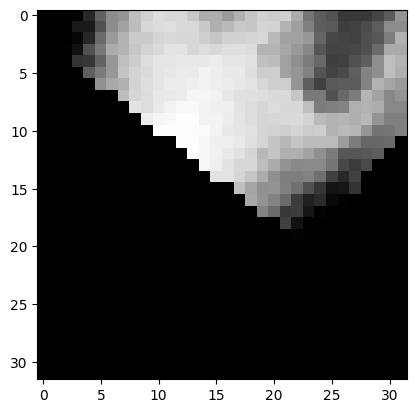

In [22]:
x_batch, y_batch = next(iter(train_DL))
print(x_batch.shape)
plt.imshow(x_batch[0].permute(1,2,0), cmap='gray')
print(test_DS.classes[y_batch[0]])

torch.Size([32, 1, 32, 32])
Negative


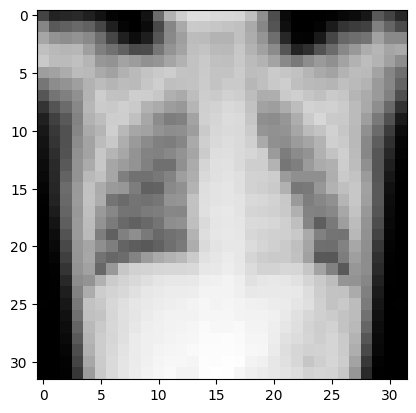

In [23]:
x_batch, y_batch = next(iter(test_DL))
print(x_batch.shape)
plt.imshow(x_batch[0].permute(1,2,0), cmap='gray')
print(test_DS.classes[y_batch[0]])